In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img,img_to_array

In [2]:
pwd

'C:\\Users\\ganesh appu\\Downloads\\intern_task\\images'

In [3]:
pic_size = 48
b_path = 'C:\\Users\\ganesh appu\\Downloads\\intern_task\\images\\images\\'

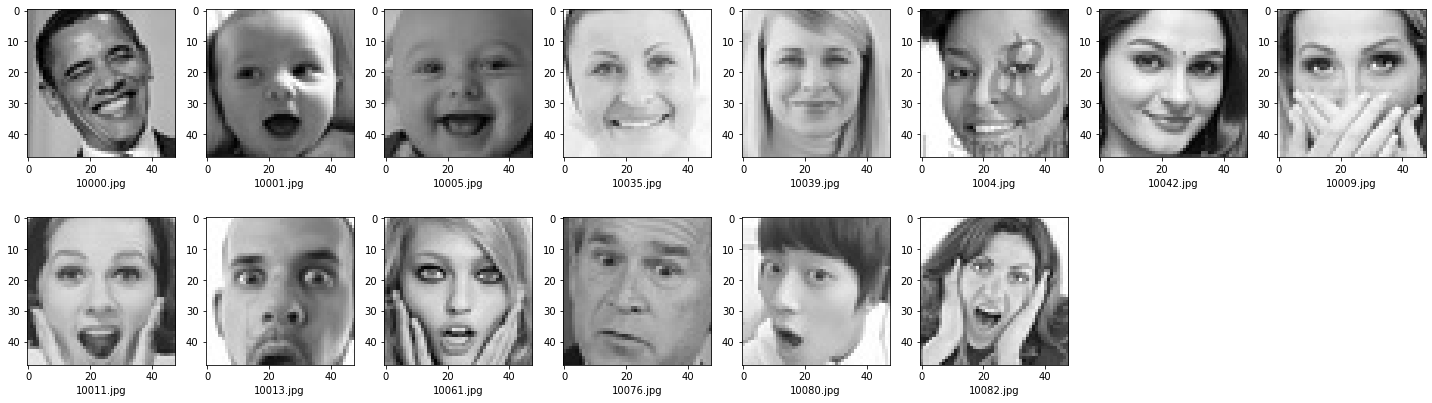

In [4]:
plt.figure(0,figsize=(20,20))
cpt=0
required_exxp = ['happy','surprise']
for expression in required_exxp:
    for i in range(1,8):
        cpt += 1
        plt.subplot(7,8,cpt)
        img=load_img(b_path+"train\\"+expression+"\\"+os.listdir(b_path+"train\\"+expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img,cmap='gray')
        plt.xlabel(os.listdir(b_path+"train\\"+expression)[i])
plt.tight_layout()
plt.show()

In [5]:
for expression in required_exxp:
    print(str(len(os.listdir(b_path + "train\\" + expression)))+" "+expression+" images")

7164 happy images
3205 surprise images


In [6]:
from keras.preprocessing.image import ImageDataGenerator as IDG

In [7]:
train_dat = IDG()
val_dat = IDG()
batch_size = 128
train_gen = train_dat.flow_from_directory(b_path+"train",target_size=(pic_size,pic_size)
                                          ,color_mode="grayscale",batch_size=batch_size,
                                          class_mode="categorical",shuffle=True)
val_gen = val_dat.flow_from_directory(b_path+"validation",target_size=(pic_size,pic_size),
                                       color_mode="grayscale",batch_size=batch_size,
                                       class_mode="categorical",shuffle=False)

Found 15351 images belonging to 3 classes.
Found 3838 images belonging to 3 classes.


In [8]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [9]:
n_classes = 3
#layer 1
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [31]:
epochs = 48
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size
                              ,epochs=epochs,validation_data = val_gen,validation_steps=val_gen.n//val_gen.batch_size,
                             callbacks = callbacks_list)

Epoch 1/48
119/119 [==============================] - 344s 3s/step - loss: 1.2696 - accuracy: 0.4047 - val_loss: 0.9153 - val_accuracy: 0.5606
Epoch 2/48
119/119 [==============================] - 309s 3s/step - loss: 1.0252 - accuracy: 0.5239 - val_loss: 0.8346 - val_accuracy: 0.6118
Epoch 3/48
119/119 [==============================] - 313s 3s/step - loss: 0.9105 - accuracy: 0.5970 - val_loss: 0.8264 - val_accuracy: 0.6479
Epoch 4/48
119/119 [==============================] - 313s 3s/step - loss: 0.8239 - accuracy: 0.6452 - val_loss: 0.8163 - val_accuracy: 0.6703
Epoch 5/48
119/119 [==============================] - 313s 3s/step - loss: 0.7689 - accuracy: 0.6674 - val_loss: 0.8597 - val_accuracy: 0.6727
Epoch 6/48
119/119 [==============================] - 312s 3s/step - loss: 0.7188 - accuracy: 0.6978 - val_loss: 0.7027 - val_accuracy: 0.7212
Epoch 7/48
119/119 [==============================] - 310s 3s/step - loss: 0.6852 - accuracy: 0.7083 - val_loss: 0.6435 - val_accuracy: 0.7427

Epoch 38/48
119/119 [==============================] - 310s 3s/step - loss: 0.2539 - accuracy: 0.9008 - val_loss: 0.4041 - val_accuracy: 0.8580
Epoch 39/48
119/119 [==============================] - 309s 3s/step - loss: 0.2554 - accuracy: 0.8992 - val_loss: 0.4480 - val_accuracy: 0.8486
Epoch 40/48
119/119 [==============================] - 335s 3s/step - loss: 0.2450 - accuracy: 0.9056 - val_loss: 0.4628 - val_accuracy: 0.8475
Epoch 41/48
119/119 [==============================] - 317s 3s/step - loss: 0.2286 - accuracy: 0.9127 - val_loss: 0.4382 - val_accuracy: 0.8521
Epoch 42/48
119/119 [==============================] - 315s 3s/step - loss: 0.2198 - accuracy: 0.9171 - val_loss: 0.4368 - val_accuracy: 0.8588
Epoch 43/48
  5/119 [>.............................] - ETA: 4:39 - loss: 0.2339 - accuracy: 0.9092

KeyboardInterrupt: 

In [10]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [11]:
model.load_weights('model.h5')

NameError: name 'history' is not defined

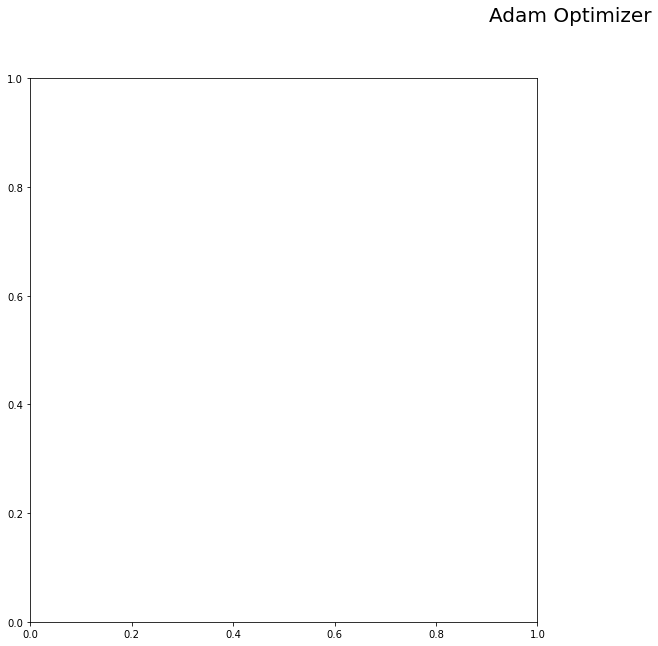

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()

In [12]:
class_labels = val_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

{0: 'happy', 1: 'neutral', 2: 'surprise'}


In [21]:
roi = test_img.astype("float") / 255.0
roi = img_to_array(roi)
roi = np.expand_dims(roi, axis=3)
preds = model.predict(roi)[0]
print(preds)

ValueError: in user code:

    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\pooling.py:296 call
        data_format=conv_utils.convert_data_format(self.data_format, 4))
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:3929 max_pool
        name=name)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:5236 max_pool
        data_format=data_format, name=name)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:595 _create_op_internal
        compute_device)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3327 _create_op_internal
        op_def=op_def)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1817 __init__
        control_input_ops, op_def)
    C:\Users\ganesh appu\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node sequential/max_pooling2d_1/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential/activation_1/Relu)' with input shapes: [?,24,1,128].


In [12]:
model.save_weights('model.h5')

[[[255 255 255]
  [252 252 252]
  [255 255 255]
  ...
  [ 48  48  48]
  [ 29  29  29]
  [ 21  21  21]]

 [[255 255 255]
  [255 255 255]
  [250 250 250]
  ...
  [ 37  37  37]
  [ 29  29  29]
  [ 19  19  19]]

 [[251 251 251]
  [255 255 255]
  [251 251 251]
  ...
  [ 38  38  38]
  [ 30  30  30]
  [ 20  20  20]]

 ...

 [[ 29  29  29]
  [ 32  32  32]
  [ 34  34  34]
  ...
  [ 33  33  33]
  [ 34  34  34]
  [ 34  34  34]]

 [[ 28  28  28]
  [ 29  29  29]
  [ 37  37  37]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 32  32  32]]

 [[ 27  27  27]
  [ 37  37  37]
  [ 35  35  35]
  ...
  [ 36  36  36]
  [ 39  39  39]
  [ 39  39  39]]]


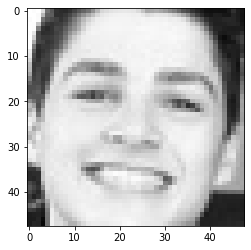

In [13]:
import cv2
test_img = cv2.imread(b_path+'train\\happy\\67.jpg')
print(test_img)
plt.imshow(test_img)

In [15]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('.\\haarcascade_frontalface_default.xml')

def face_detector(img):
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects, allfaces, img

img = cv2.imread("happyimg.jpg")
rects, faces, image = face_detector(img)

i = 0
for face in faces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # make a prediction on the ROI, then lookup the class
    preds = model.predict(roi)[0]
    label = class_labels[preds.argmax()]   

    #Overlay our detected emotion on our pic
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i =+ 1
    cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
cv2.imshow("Emotion Detector", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

ValueError: Unsupported image shape: (48,)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

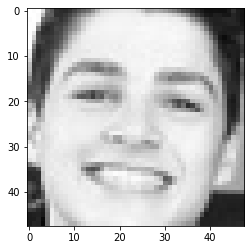

In [56]:

test_img = load_img(b_path+'\\'+'train\\happy\\67.jpg')
plt.imshow(test_img)
#test_img = cv2.resize(test_img,(pic_size,pic_size))
pred = model.predict(test_img)
predictions = argmax(pred,axis=1)
print('Predictions : '+predictions[0])
fig = plt.figure()
plt.title(predictions[0])
plt.imshow(test_img)

In [40]:
test_img_s = cv2.imread(b_path+'\\'+'train\\surprise\\29.png')
pred = model.predict(test_img_s)
predictions = argmax(pred,axis=1)
print('Predictions : '+predictions[0])
fig = plt.figure()
plt.title(predictions[0])
plt.imshow(test_img_s)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

For live cam

In [14]:
from keras.models import load_model

model = load_model('.\\model_v6_23.hdf5')

In [ ]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('.\\haarcascade_frontalface_default.xml')

def face_detector(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = model.predict(roi)[0]
        if(preds.argmax()>2):
            label = unknown
        else:
            label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()